<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;应用系统体系架构 - 人工智能模块 </h1>

<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A4：循环神经网络</h1>

## 0. 引言

这个教程主要介绍了使用循环神经网络来进行预测和文本生成的例子，有助于大家理解 RNN 和 LSTM 的使用方式。

本教程中的例子来自于ChatGPT。

## 1. 加载必要的包

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## 2. 生成模拟的时间序列数据集

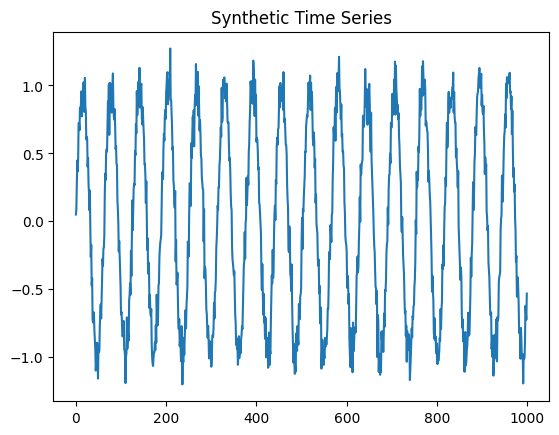

In [6]:
# Generate synthetic time series data
np.random.seed(42)
time_series = np.sin(np.arange(0, 100, 0.1)) + np.random.normal(scale=0.1, size=1000)  # Sinusoidal data with noise
plt.plot(time_series)
plt.title("Synthetic Time Series")
plt.show()

# Function to create a supervised learning dataset
def create_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series.reshape(-1, 1))

look_back = 20  # Number of previous time steps to use as input
X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input for RNN [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## 3. 构建 RNN 模型进行预测

/Users/haopengchen/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1601 - val_loss: 0.0077
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 - val_loss: 0.0029
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_lo

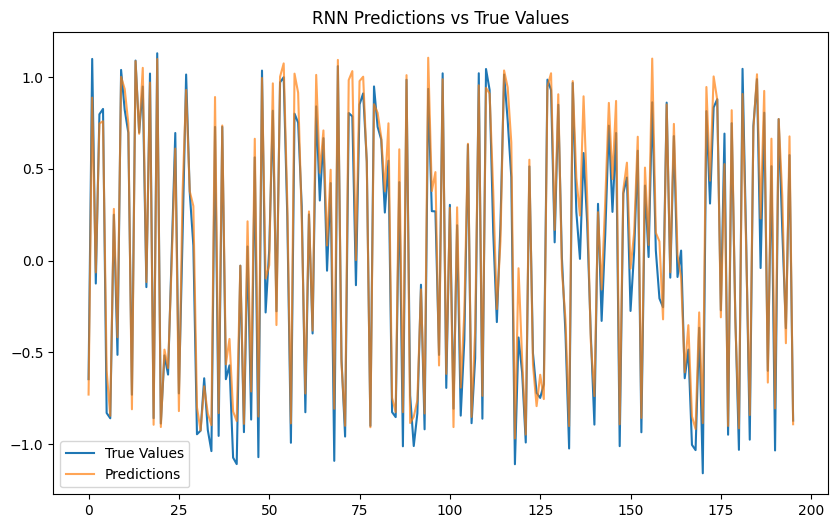

In [8]:
# Build the RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(look_back, 1), return_sequences=False, activation='tanh'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
model.save("model.keras")

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions', alpha=0.7)
plt.legend()
plt.title("RNN Predictions vs True Values")
plt.show()

## 4. 构建 LSTM 模型进行预测

/Users/haopengchen/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1700 - val_loss: 0.5519
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0281 - val_loss: 0.5370
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 - val_loss: 0.4794
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 - val_loss: 0.4422
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - val_loss: 0.4273
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.4244
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.4150
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.4147
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.4112
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.4128
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.4206
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_lo

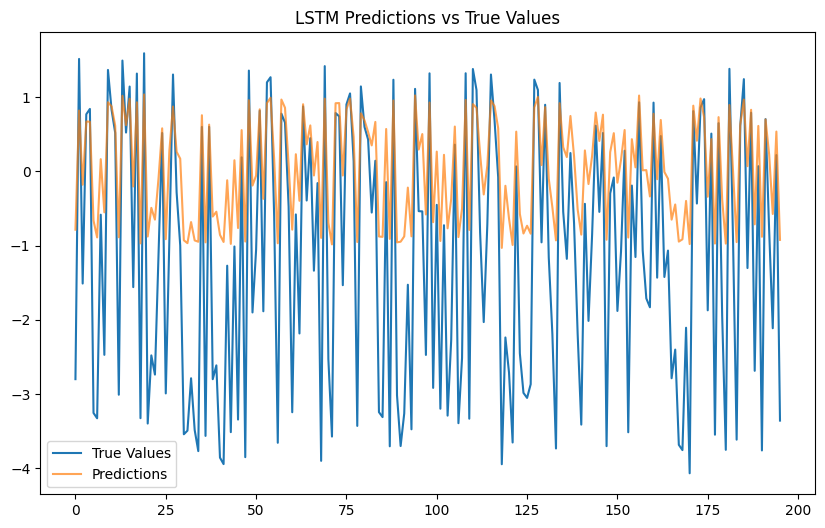

In [10]:
from keras.layers import LSTM

# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(look_back, 1), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
model.save("model.keras")

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions', alpha=0.7)
plt.legend()
plt.title("LSTM Predictions vs True Values")
plt.show()

## 5. 使用RNN进行文本生成

In [12]:
from keras.layers import Embedding
from keras.utils import to_categorical

# Sample text corpus
text = "Once upon a time, there was a brave knight who fought a dragon to save a kingdom."

# Create a character-to-index and index-to-character mapping
chars = sorted(set(text))  # Unique characters in the text
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for idx, char in enumerate(chars)}

# Parameters
seq_length = 40  # Length of input sequences
step = 3  # Step size for sampling sequences
vocab_size = len(chars)

# Prepare the dataset
sequences = []
next_chars = []
for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

x = np.zeros((len(sequences), seq_length, vocab_size), dtype=np.bool_)
y = np.zeros((len(sequences), vocab_size), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        x[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the RNN model
model = Sequential([
    SimpleRNN(128, input_shape=(seq_length, vocab_size), return_sequences=False),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

# Train the model
model.fit(x, y, batch_size=64, epochs=20)

# Text generation function
def generate_text(model, start_string, length=100):
    generated_text = start_string
    input_sequence = np.zeros((1, seq_length, vocab_size), dtype=np.bool_)

    # Prepare initial input sequence
    for i, char in enumerate(start_string):
        if i < seq_length:
            input_sequence[0, i, char_to_idx[char]] = 1

    for _ in range(length):
        # Predict next character
        predictions = model.predict(input_sequence, verbose=0)
        next_index = np.argmax(predictions)
        next_char = idx_to_char[next_index]

        # Add the predicted character to the text
        generated_text += next_char

        # Update the input sequence
        next_input = input_sequence[0, 1:]
        next_input = np.vstack([next_input, np.zeros((1, vocab_size))])
        next_input[-1, next_index] = 1
        input_sequence = next_input[np.newaxis, ...]

    return generated_text

# Generate text
start_text = "Once upon a time, there was "
generated_text = generate_text(model, start_text)
print(f"Generated Text:\n{generated_text}")

/Users/haopengchen/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        19,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,680 (88.59 KB)

 Trainable params: 22,680 (88.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - loss: 3.0965
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7917
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.5149
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.2662
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0416
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8370
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6503
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4791
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3197
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1697
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0292
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8995
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7816
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6762
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5826
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━

## 6. 使用LSTM进行文本生成

In [14]:
# Sample text corpus
text = "Once upon a time, there was a brave knight who fought a dragon to save a kingdom."

# Create a character-to-index and index-to-character mapping
chars = sorted(set(text))  # Unique characters in the text
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for idx, char in enumerate(chars)}

# Parameters
seq_length = 40  # Length of input sequences
step = 3  # Step size for sampling sequences
vocab_size = len(chars)

# Prepare the dataset
sequences = []
next_chars = []
for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

x = np.zeros((len(sequences), seq_length, vocab_size), dtype=np.bool_)
y = np.zeros((len(sequences), vocab_size), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        x[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the RNN model
model = Sequential([
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(seq_length, vocab_size), return_sequences=True),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

# Train the model
model.fit(x, y, batch_size=64, epochs=20)

# Text generation function
def generate_text(model, start_string, length=100):
    generated_text = start_string
    input_sequence = np.zeros((1, seq_length, vocab_size), dtype=np.bool_)

    # Prepare initial input sequence
    for i, char in enumerate(start_string):
        if i < seq_length:
            input_sequence[0, i, char_to_idx[char]] = 1

    for _ in range(length):
        # Predict next character
        predictions = model.predict(input_sequence, verbose=0)
        next_index = np.argmax(predictions)
        next_char = idx_to_char[next_index]

        # Add the predicted character to the text
        generated_text += next_char

        # Update the input sequence
        next_input = input_sequence[0, 1:]
        next_input = np.vstack([next_input, np.zeros((1, vocab_size))])
        next_input[-1, next_index] = 1
        input_sequence = next_input[np.newaxis, ...]

    return generated_text

# Generate text
start_text = "Once upon a time, there was "
generated_text = generate_text(model, start_text)
print(f"Generated Text:\n{generated_text}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 40, 128)        │        78,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,016 (832.09 KB)

 Trainable params: 213,016 (832.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step - loss: 3.1879
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.1713
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.1361
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.1189
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.0878
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.0572
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.9949
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.9357
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.8290
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.7334
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.6258
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.6139
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.4766
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.4919
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.4107
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━